## Problem statement and objectives
- Explore and visualize the dataset.
- Build a linear regression model to predict the prices of used cars.
- Generate a set of insights and recommendations that will help the business.

## Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Removes the limit from the number of displayed columns and rows.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

## Loading and exploring the data

In [2]:
df = pd.read_csv("used_cars_data.csv", index_col=0)
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')

There are 7253 rows and 13 columns.


In [3]:
# selecting random rows for view
np.random.seed(1)
df.sample(n=10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


## Dataset Insights
- Only 4 columns out of 12 are of numeric type: Seats and Price (float64), and Year and Kilometers_Driven (int64)
- The New_Price column is of type string but with some pre-processing can be turned into a numerical column, since it basically contains numerical values with 'Lakh' attached to them
- The oldest used car was manufactured in 1996, the newest one - in 2019
- If we look at the average value of kilometers driven and the maximum value for the same column, it is clear that 6500000 - is an outlier which is very far away from the mean.
- most of the cars seem to be standard 5-seaters
- the prices are a little skewed to the right, but seem almost symmetrical (the median is less that one std away from the mean)

In [6]:
df.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

### Observations
The column with the most null values is New_Price. The Price column also contains a significant 
(still less than New_Price) amount of null values. Other Columns contain either an insignificant or no null values


## Univariate Analysis

(array([1.635e+03, 2.024e+03, 8.780e+02, 3.460e+02, 2.150e+02, 2.010e+02,
        1.280e+02, 1.160e+02, 9.300e+01, 8.100e+01, 6.000e+01, 4.500e+01,
        3.700e+01, 3.700e+01, 2.100e+01, 2.000e+01, 1.300e+01, 1.500e+01,
        1.100e+01, 5.000e+00, 9.000e+00, 8.000e+00, 5.000e+00, 4.000e+00,
        3.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  0.44  ,   3.6312,   6.8224,  10.0136,  13.2048,  16.396 ,
         19.5872,  22.7784,  25.9696,  29.1608,  32.352 ,  35.5432,
         38.7344,  41.9256,  45.1168,  48.308 ,  51.4992,  54.6904,
         57.8816,  61.0728,  64.264 ,  67.4552,  70.6464,  73.8376,
         77.0288,  80.22  ,  83.4112,  86.6024,  89.7936,  92.9848,
         96.176 ,  99.3672, 102.5584

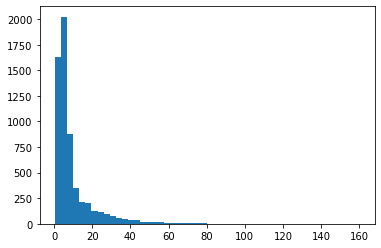

In [7]:
plt.hist(df['Price'], bins = 50)

### Comment:
- Price is very skewed and we can try to transform it using log transform

<AxesSubplot:xlabel='Kilometers_Driven'>

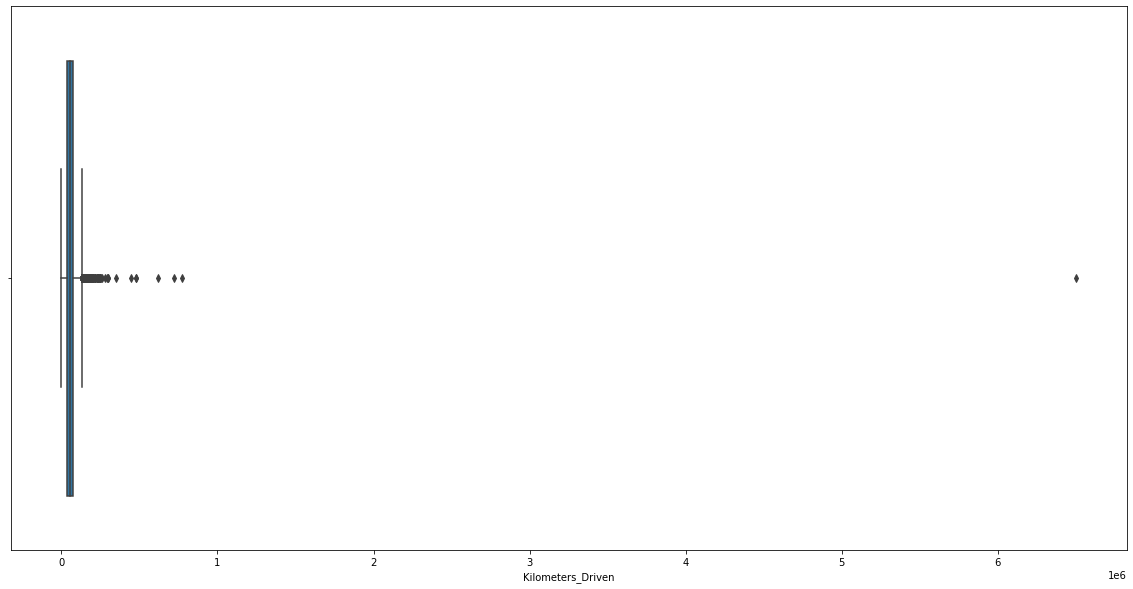

In [8]:
plt.figure(figsize=(20,10))
sns.boxplot(x = df['Kilometers_Driven'])

### Observations
- The boxplot of Kilometers driven clearly shows a single outlier which is in 6.5 million range

<AxesSubplot:xlabel='Location', ylabel='count'>

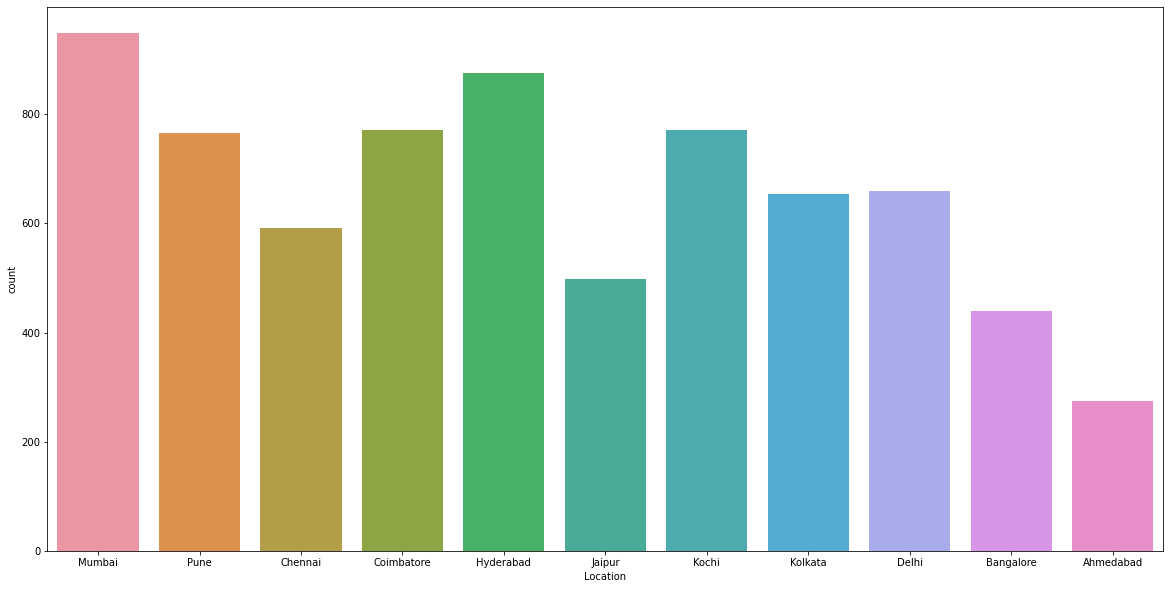

In [9]:
plt.figure(figsize=(20,10))
sns.countplot(df['Location'])

### Observations
- Most frequent locations are Mumbai followed by Hyderabad

## Data Preprocessing
Before moving on with univariate analysis I need to clean up data for some columns to turn them into numerical columns.
I will start with the New_Price column. After splitting the numerical part and the unit part, I found that basically there are two type of suffixes: 'Cr' and 'Lakh'; if the suffix is 'Cr' = 100 Lakhs, then we multiply accordingly:

In [10]:
def ConvertPrice(val):
    if isinstance(val, str):
        suf = val.split(' ')[1]
        amount = float(val.split(' ')[0])
        if suf == 'Cr':
            return amount * 100
        else:
            return amount
    else:
        return np.nan
    
df['New_Price'] = df['New_Price'].apply(ConvertPrice)
df['New_Price']

S.No.
0        NaN
1        NaN
2       8.61
3        NaN
4        NaN
        ... 
7248     NaN
7249     NaN
7250     NaN
7251     NaN
7252     NaN
Name: New_Price, Length: 7253, dtype: float64

In [11]:
df['New_Price'].isnull().sum()

6247

We see that the number of null values hasn't changed, but we now have a numerical column instead of a column of strings
Since Price is given in Lakhs, we needed to convert the New_Price to Lakhs, so that we keep the same units, for the remaining columns I will simply drop the units:

In [12]:
def stripUnits(val):
    if isinstance(val, str):
        try:
            return float(val.split(' ')[0])
        except ValueError:
            return np.nan
    else:
        return np.nan

strip_columns = ['Engine', 'Mileage', 'Power']

for colname in strip_columns:
    df[colname] = df[colname].apply(stripUnits)

In [13]:
df[strip_columns].info() # successfully converted to float64 type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Engine   7207 non-null   float64
 1   Mileage  7251 non-null   float64
 2   Power    7078 non-null   float64
dtypes: float64(3)
memory usage: 546.7 KB


Now we can continue with univariate analysis and transformations if needed:

<AxesSubplot:xlabel='Power', ylabel='Count'>

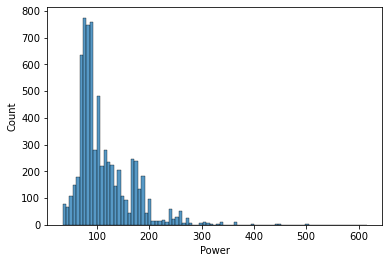

In [14]:
sns.histplot(df['Power'])

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

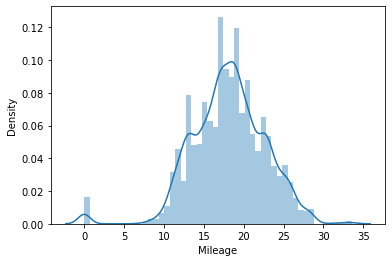

In [15]:
sns.distplot(df['Mileage'])

<AxesSubplot:xlabel='Engine', ylabel='Count'>

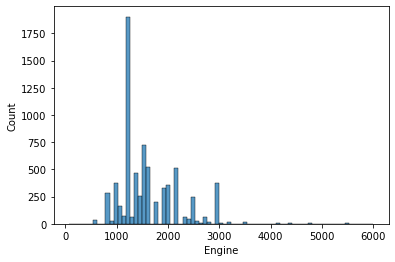

In [16]:
sns.histplot(df['Engine'])

<AxesSubplot:xlabel='New_Price', ylabel='Density'>

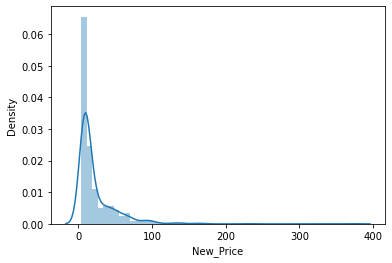

In [17]:
sns.distplot(df['New_Price'])

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Count'>

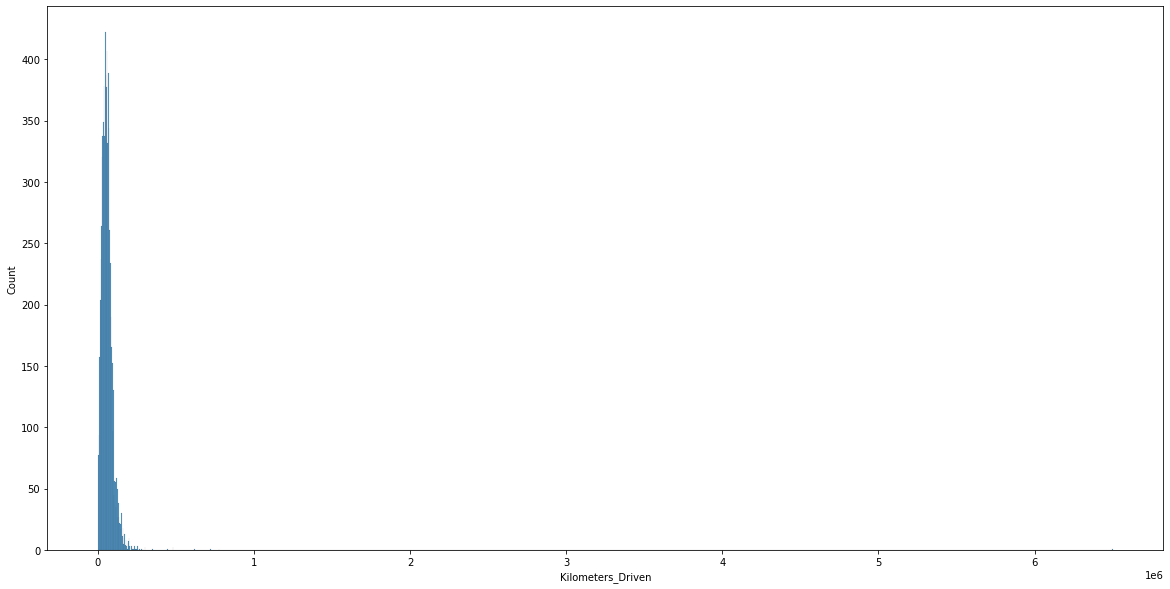

In [18]:
plt.figure(figsize=(20,10))
sns.histplot(df['Kilometers_Driven'])

### Observations
- Mileage, Power and Engine column data seem more or less uniformly distributed
- Kilometers_Driven and New_Price column data are heavily right-skewed

## Feature Engineering

Split the name of the vehicles into brand and model columns

In [19]:
df['Brand'] = df['Name'].apply(lambda val: val.split(' ')[0])
df['Brand']

S.No.
0              Maruti
1             Hyundai
2               Honda
3              Maruti
4                Audi
            ...      
7248       Volkswagen
7249       Volkswagen
7250           Nissan
7251       Volkswagen
7252    Mercedes-Benz
Name: Brand, Length: 7253, dtype: object

In [20]:
df['Model'] = df['Name'].apply(lambda val: val.split(' ', 1)[1])
df['Model']

S.No.
0                              Wagon R LXI CNG
1                     Creta 1.6 CRDi SX Option
2                                       Jazz V
3                                   Ertiga VDI
4                   A4 New 2.0 TDI Multitronic
                         ...                  
7248                    Vento Diesel Trendline
7249                               Polo GT TSI
7250                           Micra Diesel XV
7251                               Polo GT TSI
7252    E-Class 2009-2013 E 220 CDI Avantgarde
Name: Model, Length: 7253, dtype: object

### Missing value treatment 
I will group the column values by brand and find median to replace missing values

In [21]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
Brand                   0
Model                   0
dtype: int64

In [22]:
df.groupby('Brand').median()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
Brand,,,,,,,,
Ambassador,2003.0,80000.0,12.800,1489.0,35.500,5.0,NaN,1.350
Audi,2014.0,52830.0,15.730,1968.0,174.330,5.0,55.610,23.500
BMW,2013.0,54692.5,17.050,1995.0,190.000,5.0,58.670,21.000
Bentley,2007.0,39600.0,9.400,5998.0,584.000,4.5,375.000,59.000
Chevrolet,2012.0,62242.0,18.100,1199.0,79.400,5.0,NaN,2.500
Datsun,2016.0,20487.0,20.630,1198.0,67.000,5.0,4.370,3.100
Fiat,2011.0,54705.0,18.400,1248.0,90.600,5.0,8.955,2.600
Force,2014.0,41000.0,17.000,2200.0,139.010,7.0,NaN,8.000
Ford,2014.0,60924.0,18.880,1498.0,89.840,5.0,11.200,5.345


In [26]:
#df["Mileage"] = df.groupby("Brand").transform(lambda x: x.fillna(x.median()))
df.groupby("Brand").median()['Mileage']

Brand
Ambassador       12.800
Audi             15.730
BMW              17.050
Bentley           9.400
Chevrolet        18.100
Datsun           20.630
Fiat             18.400
Force            17.000
Ford             18.880
Hindustan        14.100
Honda            17.800
Hyundai          18.900
ISUZU            12.400
Isuzu            12.940
Jaguar           14.740
Jeep             17.100
Lamborghini       6.400
Land             12.630
Mahindra         15.100
Maruti           21.100
Mercedes-Benz    14.210
Mini             18.860
Mitsubishi       13.500
Nissan           19.340
OpelCorsa        14.200
Porsche          15.150
Renault          19.870
Skoda            17.200
Smart             0.000
Tata             20.475
Toyota           12.990
Volkswagen       17.210
Volvo            13.500
Name: Mileage, dtype: float64

In [24]:
df["Mileage"].head()

S.No.
0    26.60
1    19.67
2    18.20
3    20.77
4    15.20
Name: Mileage, dtype: float64